# Steepest descent aplicado à função Rosenbrock com a regra de Armijo

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método steepest descent é um método de convergência global, o qual se aproxima do mínimo com a direção de $-\nabla \boldsymbol{\phi}(\mathbf{p})$, que é menos o gradiente da função objetivo e $\mathbf{p}$ é o vetor de parâmentros. Porém, para uma melhor aproximação do mínimo é necessário de um critério mais rigoroso para a escolha da largura do passo. Para isso a chamada regra de \textit{Armijo} é um exemplo de \textit{line search}. A condição a ser satisfeita para uma direção mais aceitável é, então:

\begin{equation}
\boldsymbol{\phi}(\mathbf{p}_{k+1}) - \boldsymbol{\phi}(\mathbf{p}_k) < -\alpha \lambda\| \nabla\boldsymbol{\phi}(\mathbf{p}_k) \|^2  ,
\end{equation}

onde $\lambda = \beta^m$, $m \geq 0$ é o menor não-negativo inteiro para uma descida suficiente e $\alpha,\beta$ $\epsilon$ $(0,1)$.

1) estabelece um chute inicial $\mathbf{p}_i$

2) determina a direção $\mathbf{a}_i$ que diminua $\boldsymbol{\phi}$ em torno de $\mathbf{p}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i + \rho _i \mathbf{a}_i$, onde $\rho_i$ é um escalar que modula o passo em direção ao mínimo e $\mathbf{a}_i = -\nabla \boldsymbol{\phi}(\mathbf{p})$
 
4) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

## Plotando a função

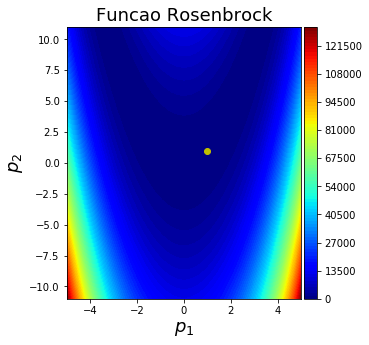

In [2]:
#definindo os parâmetros
p1 = np.linspace(-5., 5., 200)
p2 = np.linspace(-11., 11., 200)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi_plot = 100*(p2 - p1**2)**2 + (p1 - 1)**2

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_plot, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Algoritmo Steepest Descent

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100*(p0[1] - p0[0]**2)**2 + (p0[0] - 1)**2
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - valor do gradiente calculado em cada ponto (p1, p2)
    '''
    grad1 = -400*p0[0]*(p0[1] - p0[0]**2) + 2*(p0[0] - 1) 
    grad2 = 200*(p0[1] - p0[0]**2)

    grad = np.array([grad1, grad2])
    
    return grad

#critério de Armijo
#def armijo(p, dphi0, m):
    

In [42]:
# chute inicial
p01 = 0.
p02 = 0.

p0 = np.array([p01,p02]) 

alfa = 0.0001
beta = 0.4
m = 0
lamb = 0.001

phi0 = rosenbrock(p0)

p_list = [p0]
phi_list = [phi0]

In [43]:
print phi0

1.0


In [44]:
for i in range(100):
    grad = grad_rosenbrock(p0)
    p = p0 - lamb*grad
    #print p
    phi = rosenbrock(p)
    #print phi - phi0
    #print alfa*lamb*np.sqrt(np.sum(grad*grad))
    while phi - phi0 > - alfa*lamb*np.sqrt(np.sum(grad*grad)):
        m += 1
        print m
        lamb = beta**m
        print lamb
        p -= lamb*grad
        phi = rosenbrock(p)
        print phi
        grad = grad_rosenbrock(p)
        #print grad
    p0 = p
    phi0 = phi
    phi_list.append(phi0)
    p_list.append(p0)

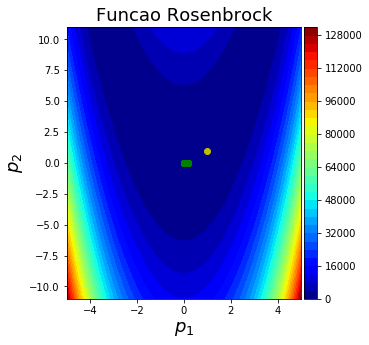

In [45]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
for p in p_list:
    plt.plot(p[0], p[1], 'og')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_plot, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()

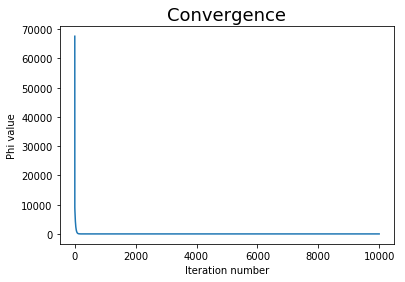

In [8]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list)
plt.savefig('convergence.png', dpi=300)
plt.show()

In [9]:
p_list

[array([  4., -10.]),
 array([-0.1606, -9.48  ]),
 array([-0.09930267, -9.28988415]),
 array([-0.06214323, -9.10388925]),
 array([-0.0392914 , -8.92173423]),
 array([-0.02505922, -8.74326867]),
 array([-0.0160896 , -8.56839074]),
 array([-0.01037173, -8.39701774]),
 array([ -6.68594979e-03,  -8.22907524e+00]),
 array([ -4.28383329e-03,  -8.06449284e+00]),
 array([ -2.70109566e-03,  -7.90320261e+00]),
 array([ -1.64666240e-03,  -7.74513842e+00]),
 array([ -9.36187764e-04,  -7.59023559e+00]),
 array([ -4.51765066e-04,  -7.43843086e+00]),
 array([ -1.17257781e-04,  -7.28966224e+00]),
 array([  1.16956456e-04,  -7.14386900e+00]),
 array([  2.83512200e-04,  -7.00099162e+00]),
 array([  4.04060835e-04,  -6.86097178e+00]),
 array([  4.93090021e-04,  -6.72375234e+00]),
 array([  5.60374791e-04,  -6.58927729e+00]),
 array([  6.12564113e-04,  -6.45749174e+00]),
 array([  6.54216483e-04,  -6.32834190e+00]),
 array([  6.88481406e-04,  -6.20177505e+00]),
 array([  7.17551424e-04,  -6.07773954e+00])

In [10]:
phi_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
def steepest(p0):
    '''
    Calcula o mínimo de uma função pelo algoritmo steepest descent
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    p: array 1D - vetor de parâmetros estimados (p1, p2)
    p0_list: lista - vetores de parâmetros estimados
    phi0_list: lista - valores
    '''